## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю. Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import warnings
df_1 = pd.read_csv('/datasets/mkrf_movies.csv')
df_2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [2]:
df_1.info() # посмотрим общую информацию о датафреймах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
df_1.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
df_2.info() # у столбцов, которые нужно объединить разный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
df_2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [6]:
df_1.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [7]:
df_1['puNumber'] = pd.to_numeric(df_1['puNumber'], errors='coerce') # при попытке изменения типа данных в ошибке появляется значения типа str.

In [8]:
df_1.isna().sum() # появился один пропуск, следовательно только одно значение типа str

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [9]:
df_1['puNumber'] = df_1['puNumber'].fillna(0) # чтобы не терять часть данных заменим его на 0, если будет необходимо в дальнейшем можно его удалить.

In [10]:
df_1['puNumber'] = df_1['puNumber'].astype('int') # переводим в целочисленный

In [11]:
df = df_1.merge(df_2, on='puNumber', how='left') # объединяем таблицы так, чтобы попали все данные из стобца mkrf_movies

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
df.head(50)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [14]:
df = df.rename(columns={'puNumber':'pu_number'}) # приводим название к соответствующему стилю

In [15]:
df.duplicated().sum() # проверяем на наличие явных дубликатов

0

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [16]:
df['ratings'].unique() # есть процентные значения

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [17]:
df['ratings'].isna().sum()

967

In [18]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [19]:
df['ratings'].isna().sum() # после перевода в тип данных float количество значений уменьшилось незначительно, поэтому удаление этих значений не сильно повлияет на исследование

996

In [20]:
df['ratings'].unique() # остальные пропуски нельзя заполнить без знания четких данных

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [21]:
df['show_start_date'] = pd.to_datetime(
    df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ') # перевод в соответствующий формат

In [22]:
df['box_office'].round() # оставим данные этого столбца с типом данных float для корректного построения графиков

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7481   NaN
7482   NaN
7483   NaN
7484   NaN
7485   NaN
Name: box_office, Length: 7486, dtype: float64

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [23]:
round(df.isna().sum()/len(df)*100,2)

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
film_studio               0.24
production_country        0.03
director                  0.12
producer                  7.59
age_restriction           0.00
refundable_support       95.57
nonrefundable_support    95.57
budget                   95.57
financing_source         95.57
ratings                  13.30
genres                   13.04
box_office               57.81
dtype: float64

Практически половина пропусков в столбце box_office. Незначительное количество в слобцах ratings, producer и genres. И практически не заполненные столбцы refundable_support, nonrefundable_support, budget, financing_source. Заполнение пропусков в столбцах с типом данных object не имеет смысла без знания правильных данных и скорее всего эти данные не важны для исследования. Схожая ситуация с данными числовых типов, заполнить их не возможно без знания конкретных данных, но важность их для исследования велика. Заполнить их медианной или средним также не возможно, так как пропущенных данных в большинстве столбцов больше 90 %.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [24]:
df.loc[df.duplicated()].sum()

title                    0.0
pu_number                0.0
type                     0.0
film_studio              0.0
production_country       0.0
director                 0.0
producer                 0.0
age_restriction          0.0
refundable_support       0.0
nonrefundable_support    0.0
budget                   0.0
financing_source         0.0
ratings                  0.0
genres                   0.0
box_office               0.0
dtype: float64

In [25]:
df['pu_number'].duplicated().sum() # незначительное количество дубликатов в этом столбце

2

In [26]:
df['title'].duplicated().sum()

714

Есть значительное количество строчек, которые практически полность повторяются, но у них разный номер прокатного удостоверения, скорее всего у одного фильма может быть несколько прокатных удостоверений, поэтому их нельзя считать за дубликаты.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [27]:
df['type'].unique() # у всех категориальных данных есть проблема с пробелами, в том числе и у столбца type.

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [28]:
for column in ['title', 'type', 'film_studio','production_country', 'director', 'producer', 'age_restriction','financing_source', 'genres']:
    df[column] = df[column].str.strip()

In [29]:
df['type'].unique() # код успешно работает

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [30]:
df.describe(include='object')

,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
count,7486,7486,7468,7484,7477,6918,7486,332,6510
unique,6772,6,5462,934,4801,5334,5,3,742
top,День святого Валентина_,Художественный,"Киностудия ""Мосфильм""",США,О.Семёнова,П.Смирнов,«16+» - для детей старше 16 лет,Министерство культуры,драма
freq,5,5909,345,2175,60,67,2851,164,476


In [31]:
df['production_country'].unique() # есть два способа написания стран через '-' или ',' поэтому нужно привести к одному варианту

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [32]:
df['production_country'] = df['production_country'].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split('-')]))

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [33]:
pd.DataFrame(df[df['budget'] == 0][['title','budget','refundable_support','nonrefundable_support']]).reset_index(drop=True)

,title,budget,refundable_support,nonrefundable_support
0,14+,0.0,0.0,23000000.0
1,Дуxless 2,0.0,0.0,75000000.0
2,Воин (2015),0.0,10000000.0,70000000.0
3,Бармен.,0.0,20000000.0,0.0
4,Савва. Сердце воина,0.0,60000000.0,100000000.0
5,Тряпичный союз,0.0,0.0,59000000.0
6,Срочно выйду замуж,0.0,0.0,35000000.0
7,Помню - не помню!,0.0,0.0,6000000.0
8,Любовь с ограничениями,0.0,19000000.0,51000000.0
9,Притяжение (2016),0.0,0.0,250000000.0


Есть некоторое количество фильмов, где бюджет равен 0, но при этом поддержка от государства не 0. В теории можно было бы заполнить эти строки с помощью выражения budget = refundable_support + nonrefundable_support, проблема только в том, что если посмотреть на строки где заполнены все три столбца можно понять, что это не сработает, так как фильмы представленные в таблице в большинстве своём имеют также альтернативные источники финансирования по мимо государственной поддержки, поэтому оставляю все как есть.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [34]:
df['show_start_date_year'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [35]:
def add_main(df, columns):
    for column in columns:
        df[f'main_{column}'] = df[column].dropna().apply(lambda x: x.split(', ')[0])
    return df

In [36]:
df = add_main(df, ['director', 'genres'])

In [37]:
df['main_genres'] = df['genres'].str.split(',').str[0]

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [38]:
df['support_in_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [39]:
df.head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,support_in_percentage
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


В исходных данных были найдены дубликаты и пропуски которые были успешно обработаны для нашего исследования. Большая часть пропусков была оставлена из-за не возможности их заполнения. В таблицу были добавленны: год премьеры фильма, столбцы с именем и фамилией главного режиссера и основного жанра фильма, и доля от общего бюджета фильма, которая составляла государственная поддержка.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [40]:
in_year = df.pivot_table(index='show_start_date_year', values='box_office', aggfunc='count')

In [41]:
in_year.sort_values('box_office', ascending=False)

,box_office
show_start_date_year,
2019,530
2016,526
2018,475
2015,465
2017,357
2014,279
2013,184
2012,128
2011,109


<AxesSubplot:title={'center':'Прокат фильмов по годам'}, xlabel='show_start_date_year'>

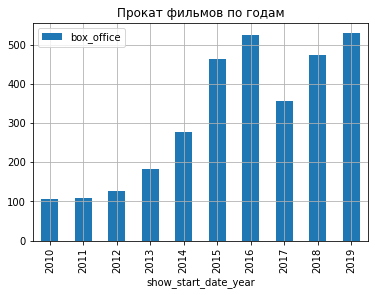

In [42]:
in_year.plot(kind='bar', grid=True, title='Прокат фильмов по годам')

In [43]:
round(df.box_office.notna().mean(),2) # Доля фильмов, для которых есть информация о сборах

0.42

По графику можно сказать, что идет увеличение числа фильмов в прокате за исключением 2017 года. Больше чем у половины фильмов отсутствует информация о сборах в кинотеатрах.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [44]:
box_office_per_year = df.pivot_table(index='show_start_date_year', values='box_office', aggfunc='sum')
box_office_per_year

,box_office
show_start_date_year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


<AxesSubplot:title={'center':'суммы сборов по годам'}, xlabel='show_start_date_year'>

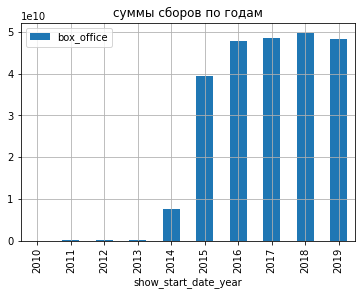

In [45]:
box_office_per_year.plot(kind='bar', grid=True, title='суммы сборов по годам')

Идет увеличение числа сборов за исключение некоторых годов и небольших погрешностей. Особенно значительное различие между 2013 и 2014 годами, и между 2014 и 2015 годами. В эти периоды происходили значительные скачки в сторону увеличения. Минимальной сумма была в 2010, а максимальной в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [46]:
df_mean_median = df.query('box_office > 0')
df_mean_median.pivot_table(index='show_start_date_year', values='box_office', aggfunc=('mean', 'median', 'sum')).astype('int')

,mean,median,sum
show_start_date_year,,,
2010,24046,1710,2428654
2011,129383,3000,14102765
2012,56548,6220,6955423
2013,166478,3580,29799706
2014,27270885,20400,7444951859
2015,85492132,5003450,39497365196
2016,91173904,3915041,47866299741
2017,136032793,9968340,48563707217
2018,104565059,8891102,49668403134


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [47]:
(pd.DataFrame(df[(df['show_start_date_year'] >= 2015) & (df['show_start_date_year'] <= 2019)].pivot_table(index='age_restriction', 
columns='show_start_date_year', values='box_office', aggfunc='sum').reset_index()))

show_start_date_year,age_restriction,2015,2016,2017,2018,2019
0,«0+» - для любой зрительской аудитории,3.790546e+08,1.502288e+08,2.295989e+08,3.244900e+07,1.774607e+07
1,«12+» - для детей старше 12 лет,1.361608e+10,1.220445e+10,7.851428e+09,1.426729e+10,1.268020e+10
2,«16+» - для детей старше 16 лет,1.136812e+10,1.666455e+10,1.874504e+10,1.650360e+10,1.275342e+10
3,«18+» - запрещено для детей,5.432308e+09,6.793930e+09,9.651496e+09,8.760086e+09,1.012180e+10
4,«6+» - для детей старше 6 лет,8.701799e+09,1.205315e+10,1.208614e+10,1.010497e+10,1.285255e+10


Возрастное ограничение влияет на сборы фильма в прокате в период с 2015 по 2019 год. В 2015 году больше всего денег в прокате собрали фильмы с маркеровкой "12+", в 2019 больше всего денег в прокате собрали фильмы с маркеровкой "6+" В остальные же года фильмы с маркировкой "16+". Изменчивость в таблице связанна скорее всего с одним популярным фильмом, который собирает большую кассу.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [48]:
df_3 = df.query('budget > 0 and box_office > 0')
df_3['budget'] = df_3['budget'].apply(lambda x: round(x/1000000,2)) # перевод в миллионы
df_3['box_office'] = df_3['box_office'].apply(lambda x: round(x/1000000,2))
warnings.filterwarnings("ignore")
df_3['budget'].describe()

/tmp/ipykernel_104/3153480252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['budget'] = df_3['budget'].apply(lambda x: round(x/1000000,2)) # перевод в миллионы
/tmp/ipykernel_104/3153480252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['box_office'] = df_3['box_office'].apply(lambda x: round(x/1000000,2))


count     301.000000
mean      134.837741
std       189.140433
min        14.460000
25%        46.160000
50%        75.000000
75%       154.250000
max      2305.070000
Name: budget, dtype: float64

Бюджет фильмов колеблется от 14 до 2305 млн.рублей, при среднем значении 134 млн.руб и медиане 75 млн.руб.

In [49]:
df_3['payback'] = df_3['budget'] / df_3['box_office'] # добавим окупаемость фильмов
warnings.filterwarnings("ignore")
df_3['payback'].head(20)

1281     214.621622
1448    1238.000000
1498       8.818637
1524     676.166667
1792     174.000000
1854       3.438329
1870       0.885299
1871      18.226216
1903       0.395550
1912     971.400000
1987       0.659903
1991      65.927273
1997       1.628302
2005       0.805416
2014      11.928344
2084       3.951585
2092       0.965981
2106     109.459459
2108     220.935484
2109       3.860206
Name: payback, dtype: float64

In [50]:
df_3['payback'].describe()

count    301.000000
mean            inf
std             NaN
min        0.052057
25%        1.275699
50%        6.727520
75%       44.293878
max             inf
Name: payback, dtype: float64

У фильмов крайне не пропорциональная окупаемость, то есть, часть фильмов сильно убыточные, а другий наоборот крайне прибыльные.

count    285.000000
mean       6.014737
std        1.141037
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

<AxesSubplot:title={'center':'Рейтинг'}, ylabel='Frequency'>

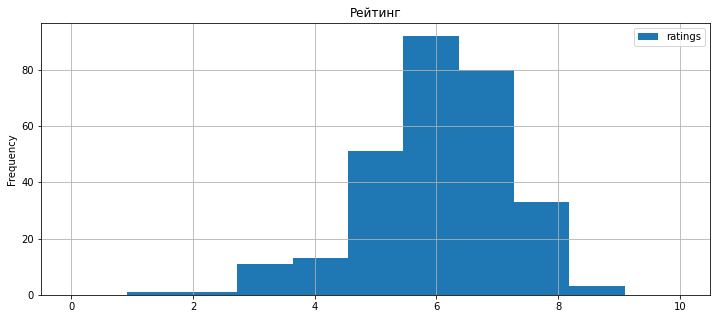

In [51]:
df_3 = df_3.query('ratings > 0')
display(df_3['ratings'].describe())
df_3.plot.hist(y='ratings', grid=True, bins=11, range=(0, 10), figsize=(12, 5), title='Рейтинг')

Средний балл выставленный зрителем совпадает с медианой.

<AxesSubplot:title={'center':'количество фильмов, получивших господдержку (по жанрам)'}>

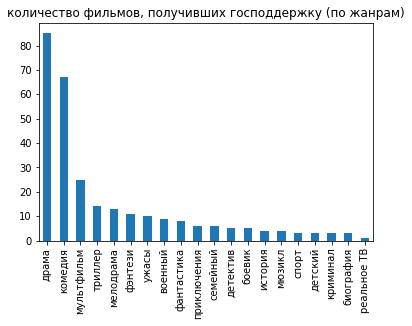

In [52]:
df_3['main_genres'].value_counts().plot(title='количество фильмов, получивших господдержку (по жанрам)', kind='bar')

In [53]:
df_3.pivot_table(index='main_genres', values='payback', aggfunc='median').round(2)


,payback
main_genres,
биография,3.16
боевик,3.02
военный,5.38
детектив,15.42
детский,36.44
драма,18.23
история,2.49
комедия,3.26
криминал,4.34


In [54]:
df_3.pivot_table(index='main_director', values='payback', aggfunc='median').sort_values(by='payback', ascending=False).head(10).round(2)

,payback
main_director,
Н.Джорджадзе,inf
И.Кордзаия,5956.00
В.Татарский,3000.00
А.Соколов,1166.67
В.Сторожева,1157.17
К.Геворкян,1155.00
Ф.Абрютин,1075.00
А.Майовер,1000.00
Стефано Лоренци,995.43


In [55]:
df_3.pivot_table(index='film_studio', values='payback', aggfunc='median').sort_values(by='payback', ascending=False).head(10).round(2)

,payback
film_studio,
"НП Киностудия детских и юношеских фильмов ""Илья Муромец""",inf
"ООО ""Первое творческое объединение""",inf
"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",9082.00
"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",5956.00
"ООО ""КИНОБЮРО""",3000.00
"ООО ""Продюсерский центр ""Синема Продакшн""",1166.67
"ФГУП ""Киноконцерн ""Мосфильм"", ООО ""Киностудия ""ВЕРТИКАЛЬ""",1157.17
"ООО ""Валдай""",1075.00
"ООО ""Кинофабрика""",1000.00


Самыми популярными жанрами являются драма и комедия, но окупаемость у них не велика. Самая большая окупаемость у жанров мюзикл и мелодрама. Также были выявлены топ-10 студий и режиссеров с самой лучшей окупаемостью.

### Шаг 5. Напишите общий вывод

Исследование проходило для министерства культуры Российской Федерации. В ходе исследования нужно было изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку.Также нужно было изучить рынок российского кинопроката и выявить текущие тренды, и попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.  Входные данные были опубликованны на портале Министерства культуры. Набор данных содержал информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 
Для начало нужно было объединить данные о прокатных удостоверениях и данные о прокате в российских кинотеатрах. В исходных данных были найдены дубликаты и пропуски которые были успешно обработаны для нашего исследования. Большая часть пропусков была оставлена из-за не возможности их заполнения. В таблицу были добавленны: год премьеры фильма, столбцы с именем и фамилией главного режиссера и основного жанра фильма, и доля от общего бюджета фильма, которая составляла государственная поддержка. Было изученно, что идет постепенное увеличение числа фильмов в прокате за исключением 2017 года. Больше чем у половины фильмов отсутстствовала информация о сборах в кинотеатрах. Сумма сборов также фильмов в прокате, также растет, особо значимый рост был в период с 2014 по 2015 год. Было доказано, что на сборы фильмов влияет возрастной рейтинг, связано это скорее всего с небольшой долей фильмов, которые делают большую кассу, возможно это фильмы из больших франшиз. В целом поддержка государства достигает от 6 до 2300 млн.руб. Была выявлена не пропорциональная окупаемость у большинства фильмов. Самыми популярными жанрами являются драма и комедия, но окупаемость у них не велика. Самая большая окупаемость у жанров мюзикл и мелодрама.